In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Trying different versions of the objective function

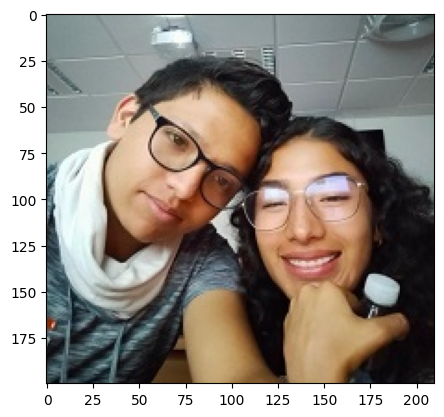

In [5]:
img = cv2.cvtColor(cv2.imread("../../data/Ow.jpg"), cv2.COLOR_BGR2RGB)
#plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.imshow(img)
plt.show()

### Correct approach

Two copies of the same image, one with an extra shape (the one that will have the alpha value)

[255]
(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 

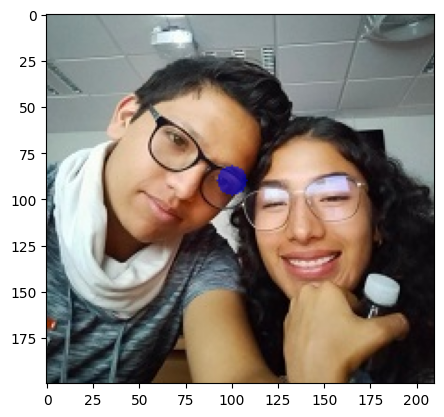

42102

In [6]:
def objective_function(vec,out, img):
    # blank mask for drawing the shapes
    shapes = np.copy(out)
    t = np.copy(out)
    # draw circle
    cv2.circle(shapes, (int(vec[0]), int(vec[1])), int(vec[2]), (vec[3], vec[4], vec[5]), cv2.FILLED)
    mask = shapes.astype(bool)
    #t[mask] = cv2.addWeighted(t, 1-vec[6], shapes, vec[6], 0)[mask]
    t = cv2.addWeighted(t, 1-vec[6], shapes, vec[6], 0)

    print(np.unique(t, return_counts=True))

    plt.imshow(t)
    plt.show()

    #bt = t[: ,: ,0]
    #gt = t[: ,: ,1]
    #rt = t[: ,: ,2]
    #bImg = img[:,:,0]
    #gImg = img[:,:,1]
    #rImg= img[:,:,2]
    # print("(",vec[3],vec[4],vec[5],")")
    #t = color.rgb2lab(t)
    #return np.sum(color.deltaE_cie76(t, img))
    return np.sum(np.abs(np.subtract(img, t))) 

    #b  = f1_score(bImg, bt, average='micro')
    #g =  f1_score(gImg, gt, average='micro')
    #r =  f1_score(rImg, rt, average='micro')
    #return np.average((r, g, b)) 
    
out = np.zeros_like(img) + 255
print(np.unique(out))
objective_function([100,90, 8, 0,0,255,0.5], img, img) #X,Y,r,R,G,B,alpha

### Wrong approach

Apply alpha of the whole `shapes` matrix with the `out` one.

The problem is that other regions are affected and that's not intended.

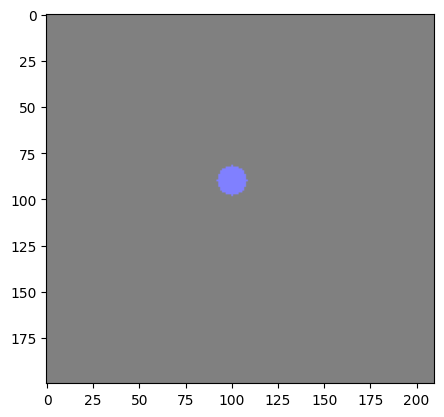

14889512

In [7]:
def objective_function(vec,out, img):
    # blank mask for drawing the shapes
    shapes = np.zeros_like(img)
    t = np.copy(out)
    # draw circle
    cv2.circle(shapes, (int(vec[0]), int(vec[1])), int(vec[2]), (vec[3], vec[4], vec[5]), cv2.FILLED)
    mask = shapes.astype(bool)
    t = cv2.addWeighted(t, 1-vec[6], shapes, vec[6], 0)

    plt.imshow(t)
    plt.show()

    #bt = t[: ,: ,0]
    #gt = t[: ,: ,1]
    #rt = t[: ,: ,2]
    #bImg = img[:,:,0]
    #gImg = img[:,:,1]
    #rImg= img[:,:,2]
    # print("(",vec[3],vec[4],vec[5],")")
    #t = color.rgb2lab(t)
    #return np.sum(color.deltaE_cie76(t, img))
    return np.sum(np.abs(np.subtract(img, t))) 

    #b  = f1_score(bImg, bt, average='micro')
    #g =  f1_score(gImg, gt, average='micro')
    #r =  f1_score(rImg, rt, average='micro')
    #return np.average((r, g, b)) 
    
out = np.zeros_like(img) + 255
objective_function([100,90, 8, 0,0,255,0.5], out, img) #X,Y,r,R,G,B,alpha

### Wrong approach

Applying the transparency over a region only using a mask doesn't work. 

WHY?

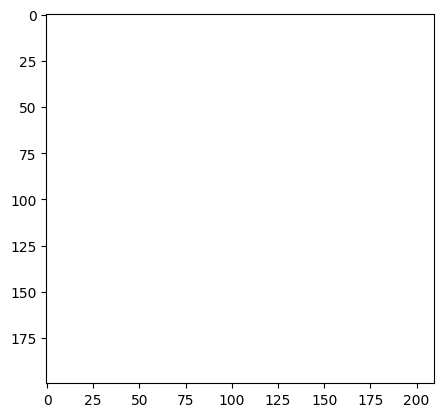

14521875

In [8]:
def objective_function(vec,out, img):
    # blank mask for drawing the shapes
    shapes = np.zeros_like(img)
    t = np.copy(out)
    # draw circle
    cv2.circle(shapes, (int(vec[0]), int(vec[1])), int(vec[2]), (vec[3], vec[4], vec[5]), cv2.FILLED)
    mask = shapes.astype(bool)
    t[mask] = cv2.addWeighted(t, 1-vec[6], shapes, vec[6], 0)[mask]

    plt.imshow(t)
    plt.show()

    #bt = t[: ,: ,0]
    #gt = t[: ,: ,1]
    #rt = t[: ,: ,2]
    #bImg = img[:,:,0]
    #gImg = img[:,:,1]
    #rImg= img[:,:,2]
    # print("(",vec[3],vec[4],vec[5],")")
    #t = color.rgb2lab(t)
    #return np.sum(color.deltaE_cie76(t, img))
    return np.sum(np.abs(np.subtract(img, t))) 

    #b  = f1_score(bImg, bt, average='micro')
    #g =  f1_score(gImg, gt, average='micro')
    #r =  f1_score(rImg, rt, average='micro')
    #return np.average((r, g, b)) 
    
out = np.zeros_like(img) + 255
objective_function([100,90, 8, 0,0,255,0.5], out, img) #X,Y,r,R,G,B,alpha